In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
class DetectorAnomalias():
    
    def __init__(self, epsilon):
        self.epsilon = epsilon
        
    def fit(self, X):
        medias = X.mean(axis = 0)
        desvios = X.std(axis = 0)
        gaussianas = [st.norm(loc = m, scale = d) for m, d in zip(medias, desvios)]  
        self.gaussianas = gaussianas
        self.X = X
        
    def prob(self, x):
        p = 1
        for i in range(self.X.shape[1]):
            gaussiana_i = self.gaussianas[i]
            x_i = x[i]
            p *= gaussiana_i.pdf(x_i)
        return p
    
    def isAnomaly(self, x):
        return int(np.where(self.prob(x) < self.epsilon, 1, 0))

In [5]:
def getData():
    return pd.read_csv("dataframe_anomalias_exercicio.csv")

In [6]:
df = getData()
df

,x1,x2,x3,x4,x5,x6,anomalia
0,7.731153,23.299155,-0.367453,4.715372,9.306179,16.780965,0.0
1,11.466833,16.943695,-0.245131,7.060311,10.462826,19.821289,0.0
2,11.501272,20.196011,1.206049,-4.957189,7.771262,19.100079,0.0
3,10.893921,16.072385,2.738045,-3.684228,7.373334,23.225524,0.0
4,10.091706,19.253894,0.996895,-9.504052,8.883988,17.903298,0.0
...,...,...,...,...,...,...,...
10095,11.192286,18.451987,-0.953650,-14.362996,10.875826,17.056541,0.0
10096,12.014177,19.461815,1.985099,-7.119190,11.079922,17.582755,0.0
10097,10.745460,18.175951,0.206037,-1.897015,9.888329,17.963324,0.0
10098,9.893969,22.333270,-1.465981,4.137382,7.690620,21.570097,0.0


In [7]:
def lanca_dado_regular():
    return np.random.choice([1,2,3,4,5,6], size = 1, p = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6])[0]

def lanca_dado_irregular(probs):
    return np.random.choice([1,2,3,4,5,6], size = 1, p = probs)[0]

In [8]:
probs = [3/10, 2/10, 2/10, 1/10, 1/10, 1/10]

lista_dado_reg = []
lista_dado_irreg = []

for i in range(10100):
    resultado1 = lanca_dado_regular()
    resultado2 = lanca_dado_irregular(probs)
    
    lista_dado_reg.append(resultado1)
    lista_dado_irreg.append(resultado2)


In [11]:
serie_reg = pd.Series(lista_dado_reg)
serie_irreg = pd.Series(lista_dado_irreg)

In [12]:
serie_reg

0        2
1        5
2        6
3        5
4        4
        ..
10095    2
10096    6
10097    1
10098    5
10099    4
Length: 10100, dtype: int64

In [13]:
serie_irreg

0        1
1        4
2        6
3        1
4        5
        ..
10095    3
10096    1
10097    1
10098    6
10099    1
Length: 10100, dtype: int64

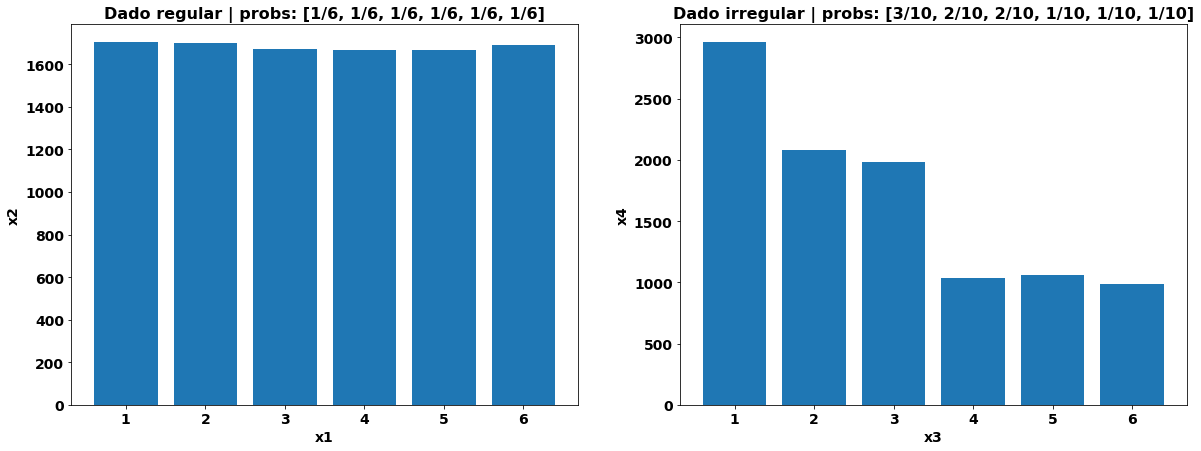

In [14]:
plt.figure(figsize=[20,7])


plt.subplot(1,2,1)
plt.bar(serie_reg.value_counts().index, serie_reg.value_counts().values)
plt.xticks(fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.xlabel("x1",fontsize = 14, fontweight = 'bold')
plt.ylabel("x2",fontsize = 14, fontweight = 'bold')
plt.title("Dado regular | probs: [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]", fontsize = 16, fontweight = 'bold')

plt.subplot(1,2,2)
plt.bar(serie_irreg.value_counts().index, serie_irreg.value_counts().values)
plt.xticks(fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.xlabel("x3",fontsize = 14, fontweight = 'bold')
plt.ylabel("x4",fontsize = 14, fontweight = 'bold')
plt.title("Dado irregular | probs: [3/10, 2/10, 2/10, 1/10, 1/10, 1/10]", fontsize = 16, fontweight = 'bold')

plt.show()

In [15]:
df.anomalia.value_counts()

0.0    10046
1.0       54
Name: anomalia, dtype: int64